<a href="https://colab.research.google.com/github/SatyaSirishaBolloju/Logistic_regression/blob/main/LogisticRegression_LoanEligibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company scantions the loan based on customer details provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others.

#Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Read Data

In [ ]:
df = pd.read_csv('Loan.csv')

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#Explore Data in Depth

In [ ]:
df.shape

(614, 13)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1.0,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0.0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1.0,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2.0,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0.0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
103,LP001356,Male,Yes,0.0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y


In [ ]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
81,LP001266,Male,Yes,1.0,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
390,LP002255,Male,No,3.0,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y
158,LP001546,Male,No,0.0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y
560,LP002807,Male,Yes,2.0,Not Graduate,No,3675,242.0,108.0,360.0,1.0,Semiurban,Y
130,LP001469,Male,No,0.0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y


In [ ]:
df[0:10]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


#Visualization of Data

array([[<Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'ApplicantIncome'}>],
       [<Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>],
       [<Axes: title={'center': 'Loan_Amount_Term'}>,
        <Axes: title={'center': 'Credit_History'}>]], dtype=object)

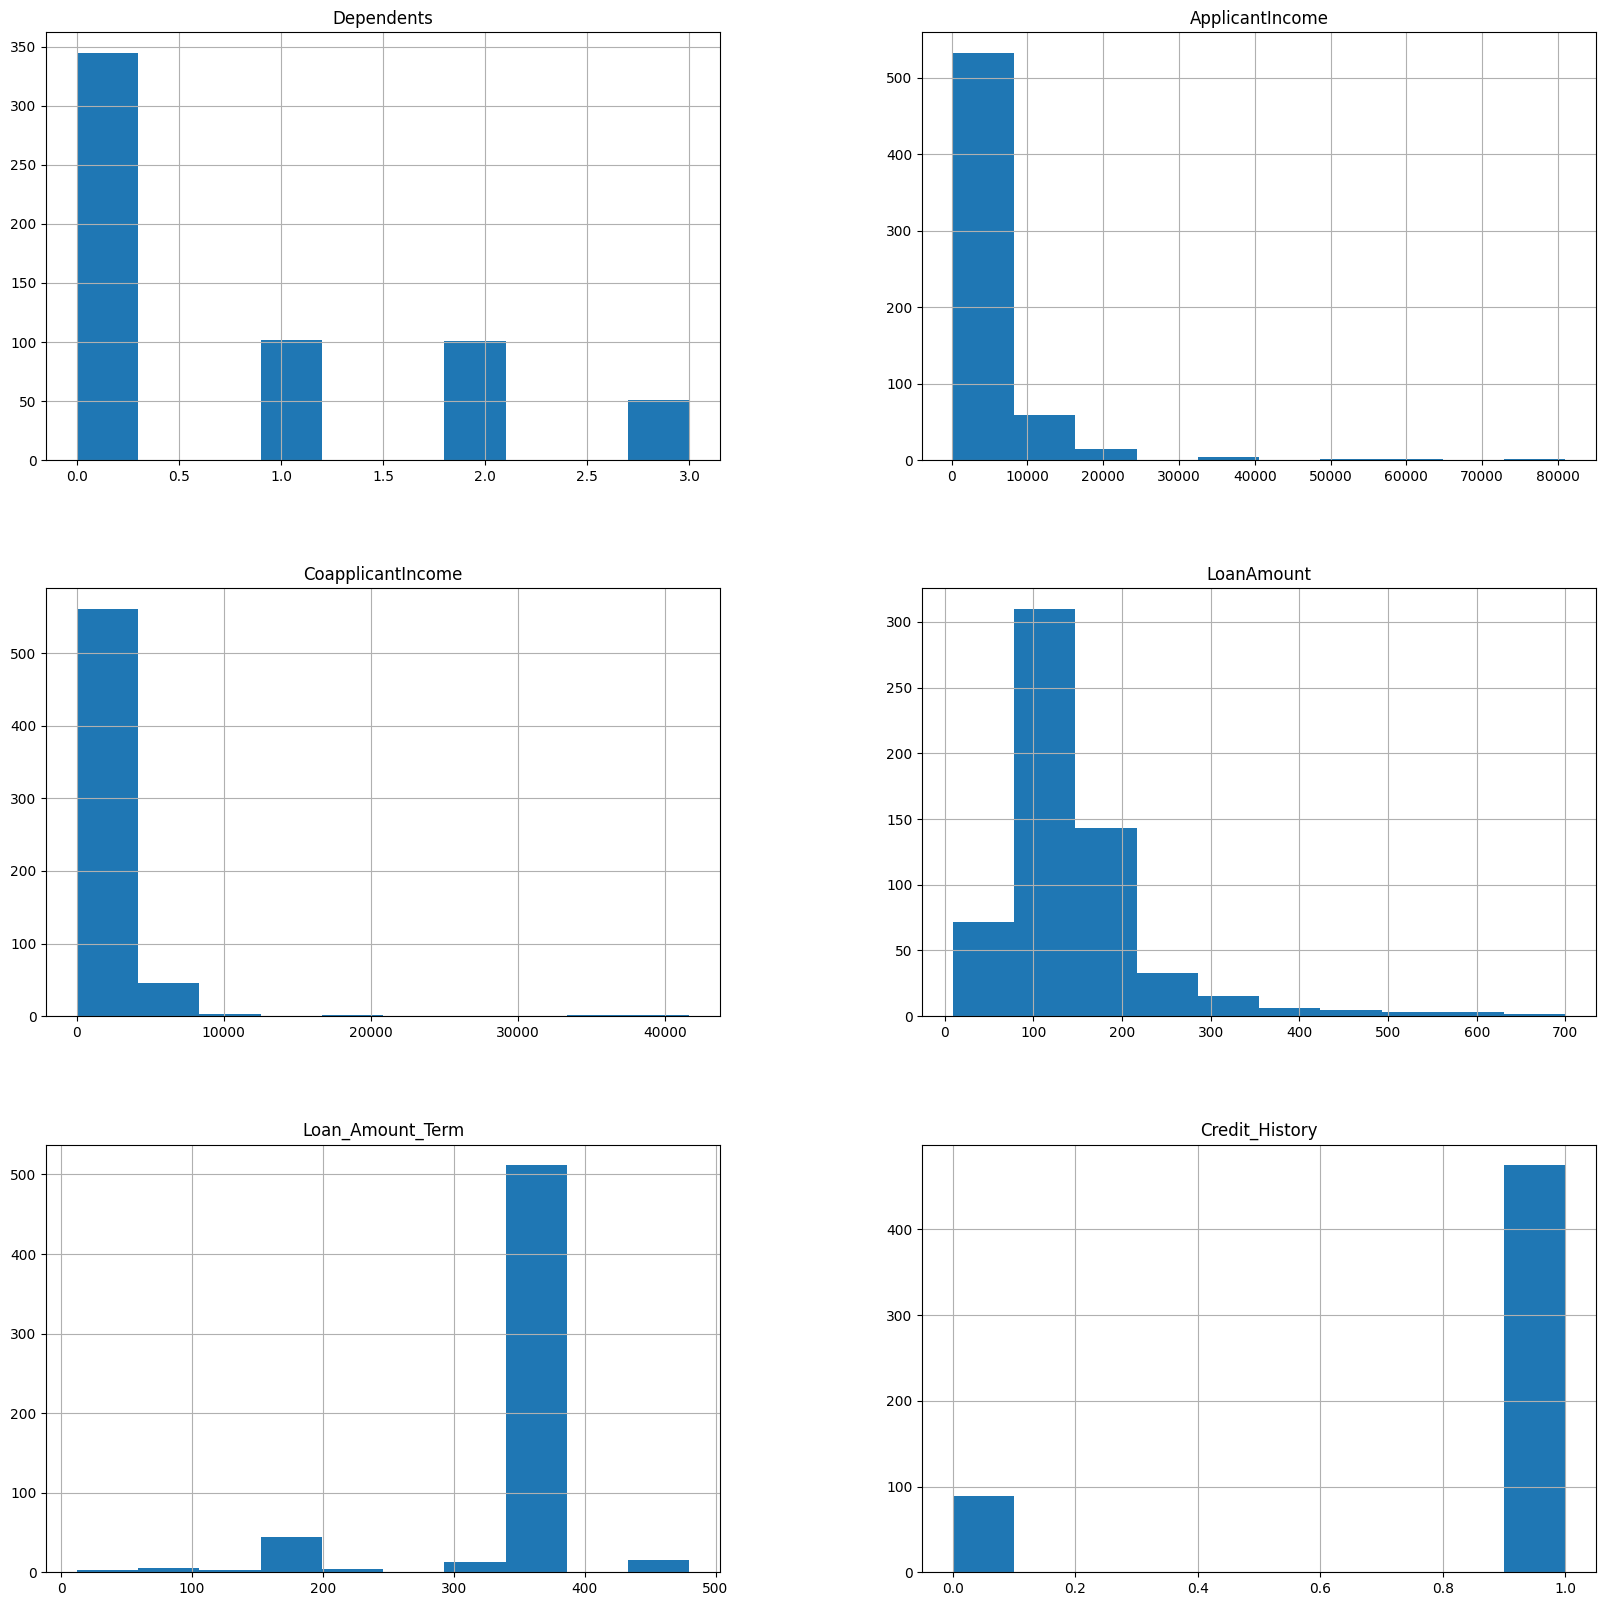

In [ ]:
df.hist(figsize = (20,20))

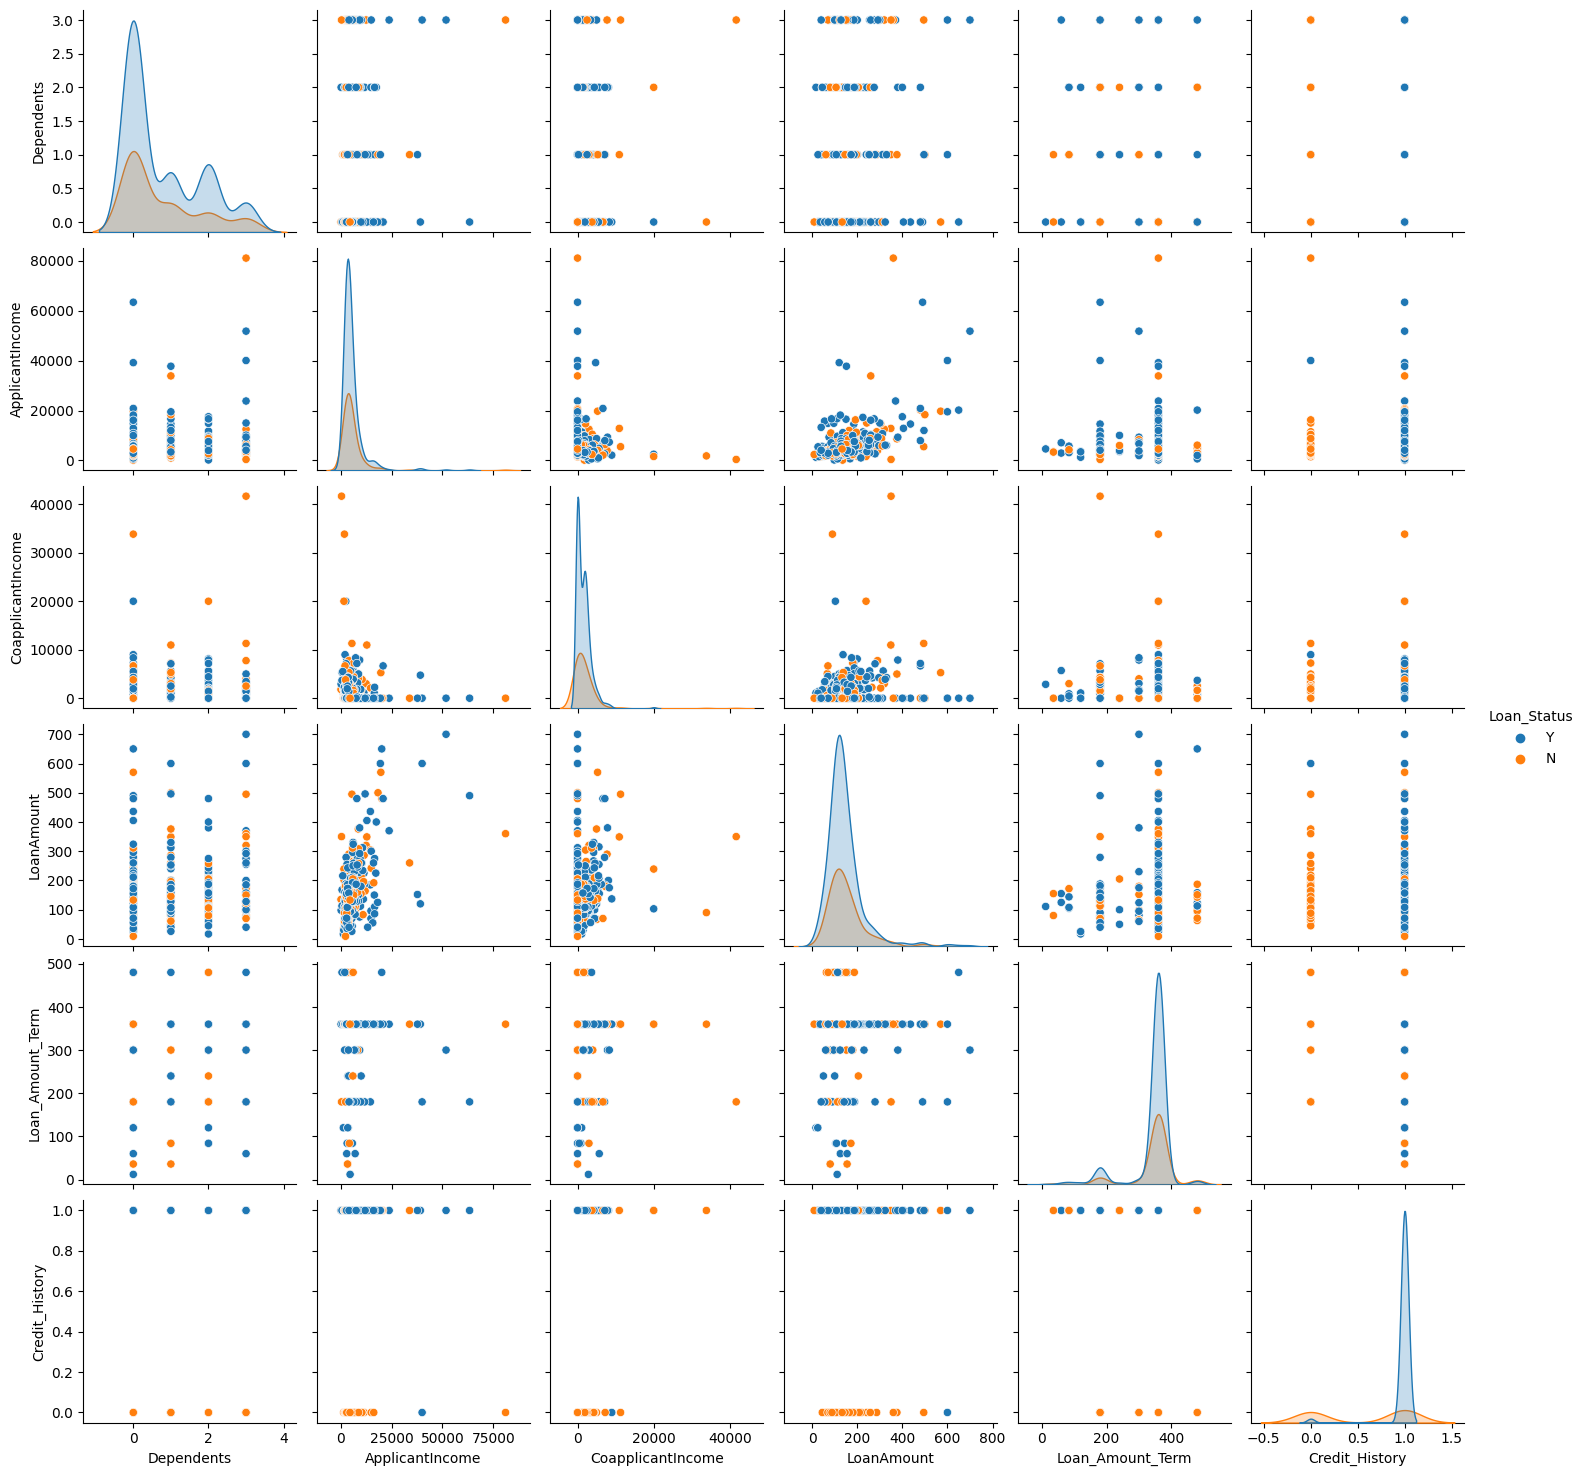

In [ ]:
sn.pairplot(df, hue = 'Loan_Status')

In [ ]:
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118679,0.027259,0.163997,-0.100484,-0.050082
ApplicantIncome,0.118679,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,0.027259,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.163997,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.100484,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.050082,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<ipython-input-23-b4b1b00bc1f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr())


<Axes: >

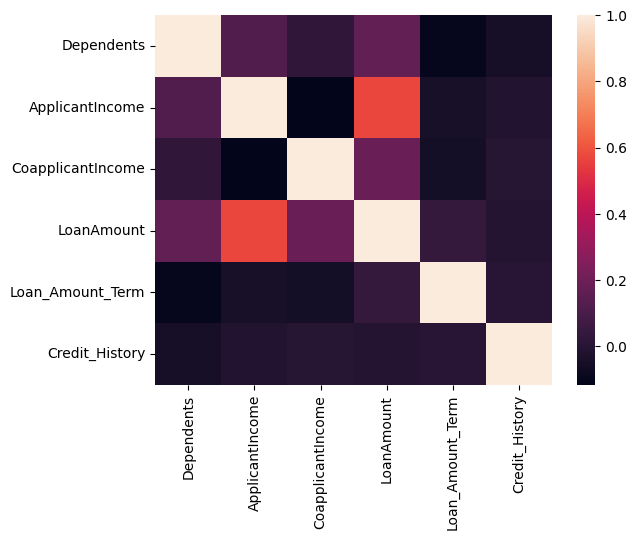

In [ ]:
sn.heatmap(df.corr())

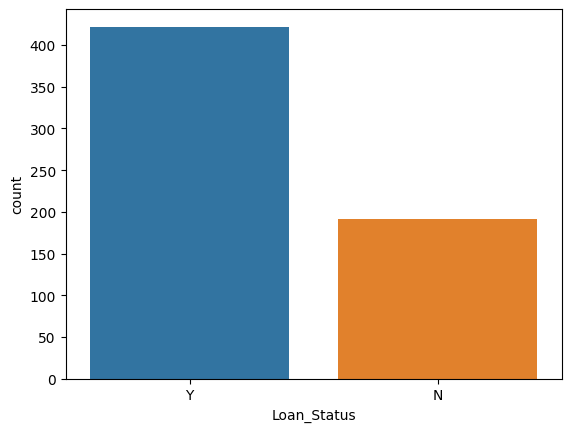

In [ ]:
sn.countplot(x='Loan_Status',data=df)
plt.show()

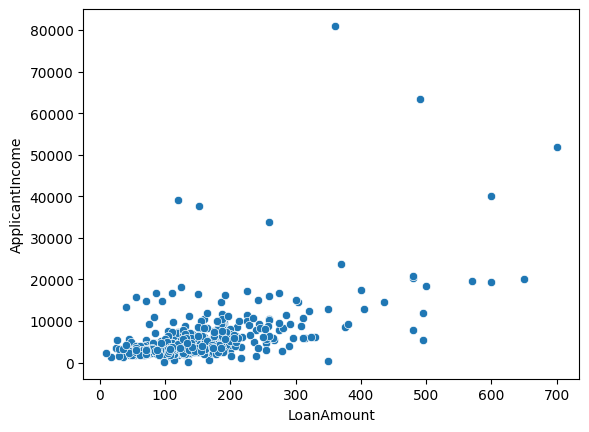

In [ ]:
sn.scatterplot(x='LoanAmount', y='ApplicantIncome',data=df)
plt.show()

<ipython-input-26-179542daaaaa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

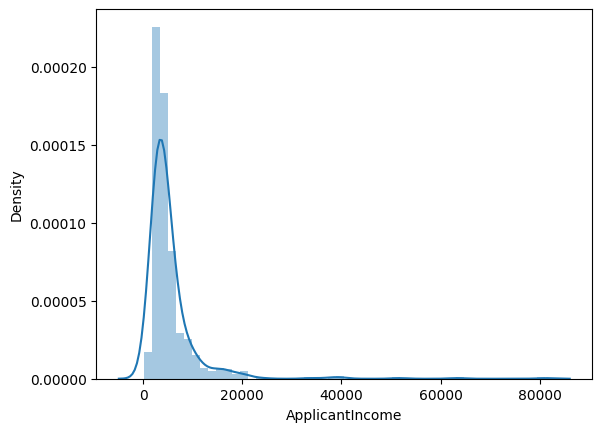

In [ ]:
sn.distplot(df['ApplicantIncome'])

#Data Cleaning

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan Amount Data is Missing

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

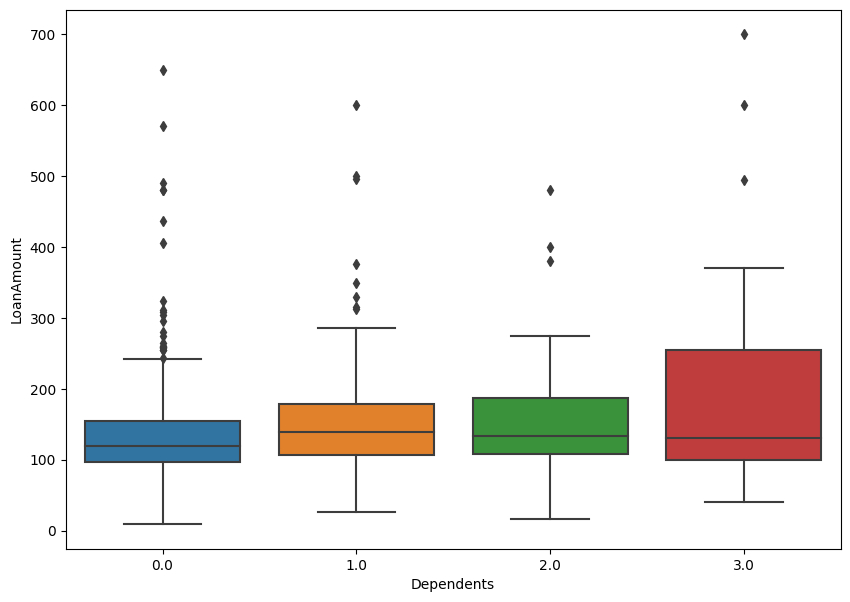

In [ ]:
plt.figure(figsize=(10,7))
sn.boxplot(x='Dependents',y='LoanAmount',data=df)

In [ ]:
df=df.dropna(axis=0)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
df.drop('Loan_ID',axis=1,inplace=True)

<ipython-input-32-807f78b0c23f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Loan_ID',axis=1,inplace=True)


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
df.drop('Property_Area',axis=1,inplace=True)

<ipython-input-34-eda46f1f9775>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Property_Area',axis=1,inplace=True)


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y


In [ ]:
pd.get_dummies(df['Gender'])

,Female,Male
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [ ]:
pd.get_dummies(df['Gender'],drop_first=True)

,Male
1,1
2,1
3,1
4,1
5,1
...,...
609,0
610,1
611,1
612,1


In [ ]:
Sex = pd.get_dummies(df['Gender'],drop_first=True)

In [ ]:
df = pd.concat([df,Sex],axis=1)

In [ ]:
df.tail(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male
603,Male,No,0.0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Y,1
604,Female,Yes,1.0,Graduate,No,12000,0.0,496.0,360.0,1.0,Y,0
606,Male,Yes,1.0,Graduate,No,3400,2500.0,173.0,360.0,1.0,Y,1
607,Male,Yes,2.0,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Y,1
608,Male,Yes,0.0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Y,1
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,0
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,1
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,1
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,1
613,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,N,0


In [ ]:
df.rename(columns=({ 'Male': 'Sex'}), inplace=True)

In [ ]:
df.drop('Gender',axis=1,inplace=True)

In [ ]:
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Sex
1,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,1
2,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,1
3,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,1
4,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,1
5,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y,1
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,0
610,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,1
611,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,1
612,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,1


In [ ]:
pd.get_dummies(df['Married'])

,No,Yes
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [ ]:
pd.get_dummies(df['Married'],drop_first=True)

,Yes
1,1
2,1
3,1
4,0
5,1
...,...
609,0
610,1
611,1
612,1


In [ ]:
Marital_status  = pd.get_dummies(df['Married'],drop_first=True)
df = pd.concat([df,Marital_status],axis=1)
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Sex,Yes
1,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,1,1
2,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,1,1
3,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,1,1
4,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,1,0
5,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y,1,1


In [ ]:
df.rename(columns=({ 'Yes': 'Marital_status'}), inplace=True)
df.drop('Married',axis=1,inplace=True)
df

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Sex,Marital_status
1,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,1,1
2,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,1,1
3,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,1,1
4,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,1,0
5,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,0,0
610,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,1,1
611,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,1,1
612,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,1,1


In [ ]:
pd.get_dummies(df['Education'])
pd.get_dummies(df['Education'],drop_first=True)
Edu  = pd.get_dummies(df['Education'],drop_first=True)
df = pd.concat([df,Edu],axis=1)
df.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Sex,Marital_status,Not Graduate
1,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,1,1,0
2,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,1,1,0
3,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,1,1,1
4,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,1,0,0
5,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y,1,1,0


In [ ]:
df.rename(columns=({ 'Not Graduate': 'Edu'}), inplace=True)
df.drop('Education',axis=1,inplace=True)
df

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Sex,Marital_status,Edu
1,1.0,No,4583,1508.0,128.0,360.0,1.0,N,1,1,0
2,0.0,Yes,3000,0.0,66.0,360.0,1.0,Y,1,1,0
3,0.0,No,2583,2358.0,120.0,360.0,1.0,Y,1,1,1
4,0.0,No,6000,0.0,141.0,360.0,1.0,Y,1,0,0
5,2.0,Yes,5417,4196.0,267.0,360.0,1.0,Y,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,No,2900,0.0,71.0,360.0,1.0,Y,0,0,0
610,3.0,No,4106,0.0,40.0,180.0,1.0,Y,1,1,0
611,1.0,No,8072,240.0,253.0,360.0,1.0,Y,1,1,0
612,2.0,No,7583,0.0,187.0,360.0,1.0,Y,1,1,0


In [ ]:
pd.get_dummies(df['Self_Employed'])
pd.get_dummies(df['Self_Employed'],drop_first=True)
Employ  = pd.get_dummies(df['Self_Employed'],drop_first=True)
df = pd.concat([df,Employ],axis=1)
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Sex,Marital_status,Edu,Yes
1,1.0,No,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0
2,0.0,Yes,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1
3,0.0,No,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0
4,0.0,No,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0
5,2.0,Yes,5417,4196.0,267.0,360.0,1.0,Y,1,1,0,1


In [ ]:
df.rename(columns=({ 'Yes': 'SelfEmployed'}), inplace=True)
df.drop('Self_Employed',axis=1,inplace=True)
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Sex,Marital_status,Edu,SelfEmployed
1,1.0,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0
4,0.0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0
5,2.0,5417,4196.0,267.0,360.0,1.0,Y,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,Y,0,0,0,0
610,3.0,4106,0.0,40.0,180.0,1.0,Y,1,1,0,0
611,1.0,8072,240.0,253.0,360.0,1.0,Y,1,1,0,0
612,2.0,7583,0.0,187.0,360.0,1.0,Y,1,1,0,0


In [ ]:
pd.get_dummies(df['Loan_Status'])
pd.get_dummies(df['Loan_Status'],drop_first=True)
Loan = pd.get_dummies(df['Loan_Status'],drop_first=True)
df = pd.concat([df,Loan],axis=1)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Sex,Marital_status,Edu,SelfEmployed,Y
1,1.0,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1,1
3,0.0,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,1
5,2.0,5417,4196.0,267.0,360.0,1.0,Y,1,1,0,1,1


In [ ]:
df.rename(columns=({ 'Y': 'LoanStatus'}), inplace=True)
df.drop('Loan_Status',axis=1,inplace=True)
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Sex,Marital_status,Edu,SelfEmployed,LoanStatus
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,1
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1
5,2.0,5417,4196.0,267.0,360.0,1.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,0,0,0,0,1
610,3.0,4106,0.0,40.0,180.0,1.0,1,1,0,0,1
611,1.0,8072,240.0,253.0,360.0,1.0,1,1,0,0,1
612,2.0,7583,0.0,187.0,360.0,1.0,1,1,0,0,1


# Decide Dependant and Independant Elements in Data Set

In [ ]:
x=df.drop('LoanStatus',axis=1)

In [ ]:
x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Sex,Marital_status,Edu,SelfEmployed
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,1,0
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0
5,2.0,5417,4196.0,267.0,360.0,1.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,0,0,0,0
610,3.0,4106,0.0,40.0,180.0,1.0,1,1,0,0
611,1.0,8072,240.0,253.0,360.0,1.0,1,1,0,0
612,2.0,7583,0.0,187.0,360.0,1.0,1,1,0,0


In [ ]:
y=df['LoanStatus']

In [ ]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: LoanStatus, Length: 480, dtype: uint8

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 203 to 416
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         336 non-null    float64
 1   ApplicantIncome    336 non-null    int64  
 2   CoapplicantIncome  336 non-null    float64
 3   LoanAmount         336 non-null    float64
 4   Loan_Amount_Term   336 non-null    float64
 5   Credit_History     336 non-null    float64
 6   Sex                336 non-null    uint8  
 7   Marital_status     336 non-null    uint8  
 8   Edu                336 non-null    uint8  
 9   SelfEmployed       336 non-null    uint8  
dtypes: float64(5), int64(1), uint8(4)
memory usage: 19.7 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 132 to 320
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         144 non-null    float64
 1   ApplicantIncome    144 non-null    int64  
 2   CoapplicantIncome  144 non-null    float64
 3   LoanAmount         144 non-null    float64
 4   Loan_Amount_Term   144 non-null    float64
 5   Credit_History     144 non-null    float64
 6   Sex                144 non-null    uint8  
 7   Marital_status     144 non-null    uint8  
 8   Edu                144 non-null    uint8  
 9   SelfEmployed       144 non-null    uint8  
dtypes: float64(5), int64(1), uint8(4)
memory usage: 8.4 KB


#Machine Learning Models

1. Linear
2. Logistic
3. SVC
4. KNN
5. K Mean
6. Desicion Tree
7. Random Forest
8. Naive Bayes

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.41      0.55        49
           1       0.76      0.96      0.85        95

    accuracy                           0.77       144
   macro avg       0.80      0.68      0.70       144
weighted avg       0.78      0.77      0.74       144

